# Netflix Data Analysis

## Import Libaries and data

In [1]:
import numpy as np # linear algebra operations
import pandas as pd # used for data preparation
import plotly.express as px #used for data visualization
from textblob import TextBlob #used for sentiment analysis

df = pd.read_csv('dataset.csv',lineterminator='\n') #reading the dataset

In [2]:
df.head() 

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [3]:
df.shape

(9827, 9)

In [4]:
df.columns

Index(['Release_Date', 'Title', 'Overview', 'Popularity', 'Vote_Count',
       'Vote_Average', 'Original_Language', 'Genre', 'Poster_Url'],
      dtype='object')

## EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [6]:
# Exploring genres
df['Genre'].unique()

array(['Action, Adventure, Science Fiction', 'Crime, Mystery, Thriller',
       'Thriller', ..., 'Comedy, TV Movie, Romance',
       'Science Fiction, Fantasy, Family, Music',
       'War, Drama, Science Fiction'], dtype=object)

In [7]:
# Checking for null values
df.isna().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

In [8]:
# checking for duplicate values
df.duplicated().sum()

0

In [9]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


min, 25%, 50%, 75%, max are divisions based on the distribution of the data.

### Summary
- The dataset has 9827 rows and 9 columns.
- There are no null values or duplicate entries in the dataset.
- Release date column is in object format, which needs to be converted to datetime.
- Overview, Original_language and poster_url columns are not needed for analysis.
- Genre column has comma-separated values and whitespaces that need to be cleaned.

## Data Cleaning

In [10]:
# changing the release date column to datetime format
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

In [11]:
print(df['Release_Date'].dtype)

datetime64[ns]


In [12]:
# Keeping year in the release date column
df['Release_Date'] = df['Release_Date'].dt.year

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   int32  
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int32(1), int64(1), object(5)
memory usage: 652.7+ KB


In [14]:
# Columns to drop
df.drop(['Overview', 'Original_Language', 'Poster_Url'], axis=1, inplace=True) # axis=1 indicates columns and inplace=True modifies the original DataFrame

In [15]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


### Categorizing Vote_Average column
We will make four categories based on the vote average: `popular`, `average`, `below_avg` and `not_popular`. 

In [16]:
def categorize_col(df,col,labels):
    """
    Categorizes a column based on specified labels.
    
    Parameters:
    df (DataFrame): The DataFrame containing the column to categorize.
    col (str): The name of the column to categorize.
    labels (list): A list of labels for categorization.
    
    Returns:
    DataFrame: The modified DataFrame with the categorized column.
    """
    # edges variable is used to define the boundaries for categorization
    # It uses the describe method to get statistical summaries of the column
    # and creates edges based on min, 25% (1st quartile), 50% (median), 75% (3rd quartile), and max values.
    # Other values which dont fall in these boundaries will be categorized as NaN.
    edges = [df[col].describe()['min'], 
            df[col].describe()['25%'],
            df[col].describe()['50%'],
            df[col].describe()['75%'],
            df[col].describe()['max']
             ]

    df[col] = pd.cut(df[col],edges, labels=labels, duplicates='drop') # pd.cut is used to segment and sort data values into bins or categories.
    # Here we pass col of the DataFrame, edges as boundaries and labels as categories and save the result in the same column.
    return df

- 25% → The 25th percentile (also called the first quartile, Q1). It means 25% of the data is below this value. 
- 50% → The 50th percentile (median, Q2). It splits the data into two halves — 50% of values are below this.
- 75% → The 75th percentile (also called the third quartile, Q3). It means 75% of the data is below this value.
- Example: If the 25th percentile of Vote_Average is 5.0, it means that 25% of the movies have a vote average below 5.0.

In [17]:
labels = ['not_popular', 'below_avg', 'average', 'popular'] # defining labels for categorization
df = categorize_col(df,'Vote_Average',labels) # categorizing the Vote_Average
df.head() # displaying the first few rows of the modified DataFrame

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


- pd.cut works in a way which divides such that if 25% is 5.9 , 50% is 6.5 and 75% is 7.2, then it will categorize the data into four categories:
  - `not_popular` for values below 5.9
  - `below_avg` for values between 5.9 and 6.5
  - `average` for values between 6.5 and 7.2
  - `popular` for values above 7.2 to 10.0
- If any row has data like 5.9, 6.5 or 7.2, it will be categorized into the nan category as pd.cut does not include the right edge of the interval by default.

In [18]:
df.isna().sum() # checking for null values after categorization
# Removing null values
df.dropna(inplace=True) # inplace=True modifies the original DataFrame

### Exploding the dataframe such that each row has only one genre
We will explode the genre column to create a new row for each genre associated with a movie.

In [19]:
df['Genre'] = df['Genre'].str.split(', ') # splitting the Genre column by comma to create a list of genres for each movie
df= df.explode('Genre').reset_index(drop=True) # exploding the Genre column to create a new row for each genre associated with a movie

In [20]:
df.head() # displaying the first few rows of the modified DataFrame

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [21]:
df.shape # checking the shape of the DataFrame after exploding the Genre column

(25552, 6)

In [22]:
df.dtypes # checking the data types of the columns in the DataFrame

Release_Date       int32
Title             object
Popularity       float64
Vote_Count         int64
Vote_Average    category
Genre             object
dtype: object

In [23]:
# casting the 'Genre' column to categorical type
df['Genre'] = df['Genre'].astype('category')
# checking the data types again to confirm the change
df.dtypes

Release_Date       int32
Title             object
Popularity       float64
Vote_Count         int64
Vote_Average    category
Genre           category
dtype: object

In [24]:
df["Genre"].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [25]:
df.info() # checking the DataFrame info to confirm the changes made

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB


## Data Visualization

In [30]:
import seaborn as sns # used for data visualization
sns.set_style('whitegrid') # setting the style for seaborn plots

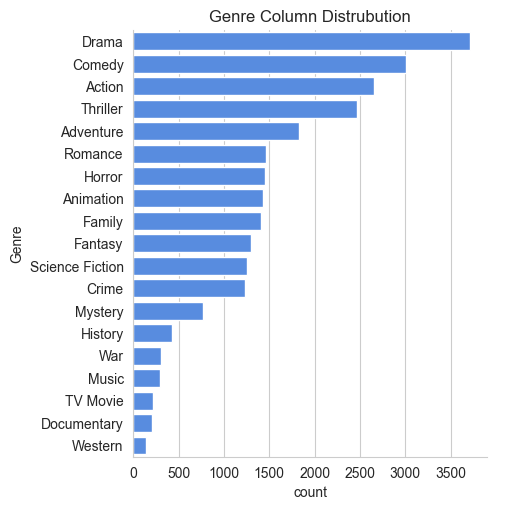

In [33]:
import matplotlib.pyplot as plt # used for plotting
sns.catplot(y='Genre',data=df,kind='count',order=df['Genre'].value_counts().index,color='#4287f5') # box plot to visualize the distribution of Vote_Average across different genres
plt.title('Genre Column Distrubution') # setting the title for the plot
plt.show() # displaying the plot

- Drama is the most popular genre, followed by Comedy and Action.

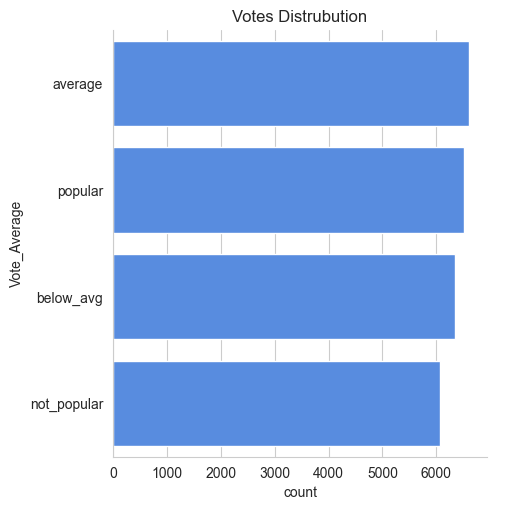

In [36]:
sns.catplot(y='Vote_Average',data=df,kind='count',order=df['Vote_Average'].value_counts().index,color='#4287f5') # box plot to visualize the distribution of Vote_Average across different genres
plt.title('Votes Distrubution') # setting the title for the plot
plt.show() # displaying the plot

In [37]:
# Checking maximum popularity rating
df[df['Popularity']== df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


In [38]:
# Cheking minimum popularity rating
df[df['Popularity']== df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,average,History
25549,1984,Threads,13.354,186,popular,War
25550,1984,Threads,13.354,186,popular,Drama
25551,1984,Threads,13.354,186,popular,Science Fiction


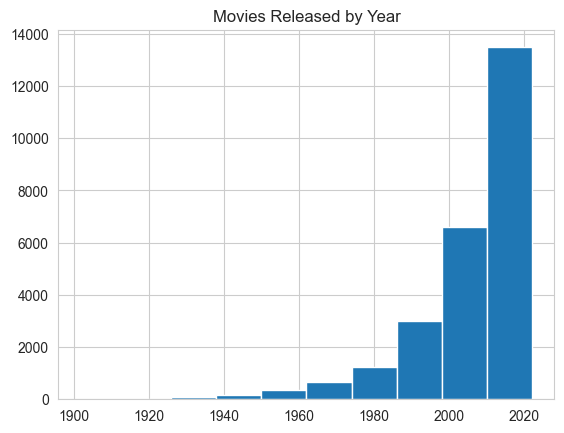

In [39]:
# Which year has the most movies released?
df['Release_Date'].hist()
plt.title('Movies Released by Year') # setting the title for the plot
plt.show() # displaying the plot

- Year 2020 has the most movies released